# Lecture 3 Pandas

In [1]:
import numpy as np

import pandas as pd

Pandas provides two types of classes for handling data:

* Series: a one-dimensional labeled array holding data of any type
such as integers, strings, Python objects etc.

* DataFrame: a two-dimensional data structure that holds data like a two-dimension array or a table with rows and columns.

## Object creation

Creating a Series by passing a list of values, letting pandas create a default RangeIndex.



In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [4]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [5]:
s.index

RangeIndex(start=0, stop=6, step=1)

In [6]:
s.values

array([ 1.,  3.,  5., nan,  6.,  8.])

In [7]:
dates = pd.date_range("20240304", periods=6)

In [8]:
dates

DatetimeIndex(['2024-03-04', '2024-03-05', '2024-03-06', '2024-03-07',
               '2024-03-08', '2024-03-09'],
              dtype='datetime64[ns]', freq='D')

In [9]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))

In [10]:
df

,A,B,C,D
2024-03-04,-2.472299,1.050664,0.740582,0.108164
2024-03-05,-0.189892,0.806697,-0.674705,-0.643716
2024-03-06,0.734630,-0.834201,1.520263,-0.267087
2024-03-07,0.878030,-0.683709,-2.512337,-1.592653
2024-03-08,0.456631,-0.295604,0.474470,1.056362
2024-03-09,-0.034112,0.940670,0.391525,1.068984


In [11]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20240304"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

In [12]:
df2

,A,B,C,D,E,F
0,1.0,2024-03-04,1.0,3,test,foo
1,1.0,2024-03-04,1.0,3,train,foo
2,1.0,2024-03-04,1.0,3,test,foo
3,1.0,2024-03-04,1.0,3,train,foo


In [13]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing data

In [16]:
df.head(2)

,A,B,C,D
2024-03-04,-2.472299,1.050664,0.740582,0.108164
2024-03-05,-0.189892,0.806697,-0.674705,-0.643716


In [17]:
df.tail(3)

,A,B,C,D
2024-03-07,0.878030,-0.683709,-2.512337,-1.592653
2024-03-08,0.456631,-0.295604,0.474470,1.056362
2024-03-09,-0.034112,0.940670,0.391525,1.068984


In [18]:
df.index

DatetimeIndex(['2024-03-04', '2024-03-05', '2024-03-06', '2024-03-07',
               '2024-03-08', '2024-03-09'],
              dtype='datetime64[ns]', freq='D')

In [19]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [20]:
df.to_numpy()

array([[-2.47229866,  1.05066395,  0.7405824 ,  0.10816354],
       [-0.18989159,  0.80669721, -0.6747045 , -0.64371564],
       [ 0.73462953, -0.83420083,  1.52026266, -0.26708671],
       [ 0.87803034, -0.68370865, -2.51233655, -1.59265334],
       [ 0.45663139, -0.29560423,  0.47447   ,  1.05636175],
       [-0.03411162,  0.94067025,  0.39152469,  1.06898364]])

In [21]:
df2.to_numpy()

array([[1.0, Timestamp('2024-03-04 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2024-03-04 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2024-03-04 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2024-03-04 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [30]:
df.drop(columns=(1, 1),inplace=True)

In [32]:
df['A'][1]=1e4

In [33]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,1666.593813,0.164086,-0.010034,-0.044991
std,4082.518781,0.863562,1.414534,1.027660
min,-2.472299,-0.834201,-2.512337,-1.592653
25%,0.088574,-0.586683,-0.408147,-0.549558
50%,0.595630,0.255546,0.432997,-0.079462
75%,0.842180,0.907177,0.674054,0.819312
max,10000.000000,1.050664,1.520263,1.068984


In [22]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.104502,0.164086,-0.010034,-0.044991
std,1.233133,0.863562,1.414534,1.027660
min,-2.472299,-0.834201,-2.512337,-1.592653
25%,-0.150947,-0.586683,-0.408147,-0.549558
50%,0.211260,0.255546,0.432997,-0.079462
75%,0.665130,0.907177,0.674054,0.819312
max,0.878030,1.050664,1.520263,1.068984


In [21]:
df.T

,2024-03-04,2024-03-05,2024-03-06,2024-03-07,2024-03-08,2024-03-09
A,-0.756207,-1.088456,-0.527341,0.095006,0.793368,-0.515756
B,1.510361,-0.025907,1.283840,0.113785,0.385850,0.445482
C,0.337024,0.268273,-0.465985,0.747515,0.723448,1.308292
D,1.127544,1.487004,-0.263081,1.063715,0.644845,-1.588143


In [22]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2024-03-04,1.127544,0.337024,1.510361,-0.756207
2024-03-05,1.487004,0.268273,-0.025907,-1.088456
2024-03-06,-0.263081,-0.465985,1.283840,-0.527341
2024-03-07,1.063715,0.747515,0.113785,0.095006
2024-03-08,0.644845,0.723448,0.385850,0.793368
2024-03-09,-1.588143,1.308292,0.445482,-0.515756


In [35]:
df

,A,B,C,D
2024-03-04,-2.472299,1.050664,0.740582,0.108164
2024-03-05,10000.000000,0.806697,-0.674705,-0.643716
2024-03-06,0.734630,-0.834201,1.520263,-0.267087
2024-03-07,0.878030,-0.683709,-2.512337,-1.592653
2024-03-08,0.456631,-0.295604,0.474470,1.056362
2024-03-09,-0.034112,0.940670,0.391525,1.068984


In [34]:
df.sort_values(by="B")

,A,B,C,D
2024-03-06,0.734630,-0.834201,1.520263,-0.267087
2024-03-07,0.878030,-0.683709,-2.512337,-1.592653
2024-03-08,0.456631,-0.295604,0.474470,1.056362
2024-03-05,10000.000000,0.806697,-0.674705,-0.643716
2024-03-09,-0.034112,0.940670,0.391525,1.068984
2024-03-04,-2.472299,1.050664,0.740582,0.108164


### Get item

In [36]:
df["A"]

2024-03-04       -2.472299
2024-03-05    10000.000000
2024-03-06        0.734630
2024-03-07        0.878030
2024-03-08        0.456631
2024-03-09       -0.034112
Freq: D, Name: A, dtype: float64

In [38]:
df[0:3][['A','B']]

,A,B
2024-03-04,-2.472299,1.050664
2024-03-05,10000.000000,0.806697
2024-03-06,0.734630,-0.834201


In [26]:
df["2024-03-05":"2024-03-09"]

,A,B,C,D
2024-03-05,-1.088456,-0.025907,0.268273,1.487004
2024-03-06,-0.527341,1.283840,-0.465985,-0.263081
2024-03-07,0.095006,0.113785,0.747515,1.063715
2024-03-08,0.793368,0.385850,0.723448,0.644845
2024-03-09,-0.515756,0.445482,1.308292,-1.588143


### Selection by label

In [40]:
df

,A,B,C,D
2024-03-04,-2.472299,1.050664,0.740582,0.108164
2024-03-05,10000.000000,0.806697,-0.674705,-0.643716
2024-03-06,0.734630,-0.834201,1.520263,-0.267087
2024-03-07,0.878030,-0.683709,-2.512337,-1.592653
2024-03-08,0.456631,-0.295604,0.474470,1.056362
2024-03-09,-0.034112,0.940670,0.391525,1.068984


In [41]:
dates[0]

Timestamp('2024-03-04 00:00:00', freq='D')

In [39]:
df.loc[dates[0]]

A   -2.472299
B    1.050664
C    0.740582
D    0.108164
Name: 2024-03-04 00:00:00, dtype: float64

In [51]:
df.iloc[:3, :2]


,A,B
2024-03-04,NaN,1.050664
2024-03-05,10000.00000,0.806697
2024-03-06,0.73463,-0.834201


In [29]:
df.loc["2024-03-05":"2024-03-09", ["A", "B"]]

,A,B
2024-03-05,-1.088456,-0.025907
2024-03-06,-0.527341,1.283840
2024-03-07,0.095006,0.113785
2024-03-08,0.793368,0.385850
2024-03-09,-0.515756,0.445482


In [44]:
df.loc[dates[0], "A"]=np.nan

In [45]:
df

,A,B,C,D
2024-03-04,NaN,1.050664,0.740582,0.108164
2024-03-05,10000.000000,0.806697,-0.674705,-0.643716
2024-03-06,0.734630,-0.834201,1.520263,-0.267087
2024-03-07,0.878030,-0.683709,-2.512337,-1.592653
2024-03-08,0.456631,-0.295604,0.474470,1.056362
2024-03-09,-0.034112,0.940670,0.391525,1.068984


In [31]:
df.at[dates[0], "A"]

-0.7562074294611416

### Selection by position

In [52]:
df.iloc[3]

A    0.878030
B   -0.683709
C   -2.512337
D   -1.592653
Name: 2024-03-07 00:00:00, dtype: float64

In [53]:
df.iloc[3:5, 0:2]

,A,B
2024-03-07,0.878030,-0.683709
2024-03-08,0.456631,-0.295604


In [54]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2024-03-05,10000.000000,-0.674705
2024-03-06,0.734630,1.520263
2024-03-08,0.456631,0.474470


In [55]:
df.iloc[1:3, :]

,A,B,C,D
2024-03-05,10000.00000,0.806697,-0.674705,-0.643716
2024-03-06,0.73463,-0.834201,1.520263,-0.267087


In [56]:
df.iloc[:, 1:3]

,B,C
2024-03-04,1.050664,0.740582
2024-03-05,0.806697,-0.674705
2024-03-06,-0.834201,1.520263
2024-03-07,-0.683709,-2.512337
2024-03-08,-0.295604,0.474470
2024-03-09,0.940670,0.391525


In [57]:
df.iloc[1, 1]

0.8066972128941585

In [58]:
df.iat[1, 1]

0.8066972128941585

### Boolean indexing

In [59]:
df[df["A"] > 0]

,A,B,C,D
2024-03-05,10000.000000,0.806697,-0.674705,-0.643716
2024-03-06,0.734630,-0.834201,1.520263,-0.267087
2024-03-07,0.878030,-0.683709,-2.512337,-1.592653
2024-03-08,0.456631,-0.295604,0.474470,1.056362


In [60]:
df["A"] > 0

2024-03-04    False
2024-03-05     True
2024-03-06     True
2024-03-07     True
2024-03-08     True
2024-03-09    False
Freq: D, Name: A, dtype: bool

In [61]:
df[df > 0]

,A,B,C,D
2024-03-04,NaN,1.050664,0.740582,0.108164
2024-03-05,10000.000000,0.806697,NaN,NaN
2024-03-06,0.734630,NaN,1.520263,NaN
2024-03-07,0.878030,NaN,NaN,NaN
2024-03-08,0.456631,NaN,0.474470,1.056362
2024-03-09,NaN,0.940670,0.391525,1.068984


In [62]:
df > 0


,A,B,C,D
2024-03-04,False,True,True,True
2024-03-05,True,True,False,False
2024-03-06,True,False,True,False
2024-03-07,True,False,False,False
2024-03-08,True,False,True,True
2024-03-09,False,True,True,True


In [66]:
df2 = df.copy()

In [67]:
#add new column
df2["E"] = ["one", "one", "two", "three", "four", "three"]

In [68]:
df2

,A,B,C,D,E
2024-03-04,NaN,1.050664,0.740582,0.108164,one
2024-03-05,10000.000000,0.806697,-0.674705,-0.643716,one
2024-03-06,0.734630,-0.834201,1.520263,-0.267087,two
2024-03-07,0.878030,-0.683709,-2.512337,-1.592653,three
2024-03-08,0.456631,-0.295604,0.474470,1.056362,four
2024-03-09,-0.034112,0.940670,0.391525,1.068984,three


### Setting

In [69]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20240304", periods=6))


In [70]:
df["F"] = s1

In [71]:
df

,A,B,C,D,F
2024-03-04,NaN,1.050664,0.740582,0.108164,1
2024-03-05,10000.000000,0.806697,-0.674705,-0.643716,2
2024-03-06,0.734630,-0.834201,1.520263,-0.267087,3
2024-03-07,0.878030,-0.683709,-2.512337,-1.592653,4
2024-03-08,0.456631,-0.295604,0.474470,1.056362,5
2024-03-09,-0.034112,0.940670,0.391525,1.068984,6


In [47]:
df.at[dates[0], "A"] = 0

In [72]:
df

,A,B,C,D,F
2024-03-04,NaN,1.050664,0.740582,0.108164,1
2024-03-05,10000.000000,0.806697,-0.674705,-0.643716,2
2024-03-06,0.734630,-0.834201,1.520263,-0.267087,3
2024-03-07,0.878030,-0.683709,-2.512337,-1.592653,4
2024-03-08,0.456631,-0.295604,0.474470,1.056362,5
2024-03-09,-0.034112,0.940670,0.391525,1.068984,6


In [73]:
df.iat[0, 1] = 0

In [74]:
df.loc[:, "D"] = np.array([5] * len(df))

/var/folders/vl/q2hgcdvs435_0rq4cfpntjlr0000gn/T/ipykernel_1837/2422562958.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "D"] = np.array([5] * len(df))


In [75]:
df

,A,B,C,D,F
2024-03-04,NaN,0.000000,0.740582,5,1
2024-03-05,10000.000000,0.806697,-0.674705,5,2
2024-03-06,0.734630,-0.834201,1.520263,5,3
2024-03-07,0.878030,-0.683709,-2.512337,5,4
2024-03-08,0.456631,-0.295604,0.474470,5,5
2024-03-09,-0.034112,0.940670,0.391525,5,6


In [76]:
df2 = df.copy()

In [79]:
df2[df2 > 0] = -df2

In [80]:
df2

,A,B,C,D,F
2024-03-04,NaN,0.000000,-0.740582,-5,-1
2024-03-05,-10000.000000,-0.806697,-0.674705,-5,-2
2024-03-06,-0.734630,-0.834201,-1.520263,-5,-3
2024-03-07,-0.878030,-0.683709,-2.512337,-5,-4
2024-03-08,-0.456631,-0.295604,-0.474470,-5,-5
2024-03-09,-0.034112,-0.940670,-0.391525,-5,-6


## Missing value

In [84]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

In [85]:
df1.loc[dates[0] : dates[1], "E"] = 1

In [86]:
df1

,A,B,C,D,F,E
2024-03-04,NaN,0.000000,0.740582,5,1,1.0
2024-03-05,10000.00000,0.806697,-0.674705,5,2,1.0
2024-03-06,0.73463,-0.834201,1.520263,5,3,NaN
2024-03-07,0.87803,-0.683709,-2.512337,5,4,NaN


In [87]:
df1.dropna(how="any")

,A,B,C,D,F,E
2024-03-05,10000.0,0.806697,-0.674705,5,2,1.0


In [59]:
df1.fillna(value=5)

,A,B,C,D,F,E
2024-03-04,0.000000,0.000000,0.337024,5,1,1.0
2024-03-05,-1.088456,-0.025907,0.268273,5,2,1.0
2024-03-06,-0.527341,1.283840,-0.465985,5,3,5.0
2024-03-07,0.095006,0.113785,0.747515,5,4,5.0


In [90]:
df

,A,B,C,D,F
2024-03-04,NaN,0.000000,0.740582,5,1
2024-03-05,10000.000000,0.806697,-0.674705,5,2
2024-03-06,0.734630,-0.834201,1.520263,5,3
2024-03-07,0.878030,-0.683709,-2.512337,5,4
2024-03-08,0.456631,-0.295604,0.474470,5,5
2024-03-09,-0.034112,0.940670,0.391525,5,6


In [91]:
pd.isna(df1).sum()/6

A    0.166667
B    0.000000
C    0.000000
D    0.000000
F    0.000000
E    0.333333
dtype: float64

## Operations

In [62]:
df

,A,B,C,D,F
2024-03-04,0.000000,0.000000,0.337024,5,1
2024-03-05,-1.088456,-0.025907,0.268273,5,2
2024-03-06,-0.527341,1.283840,-0.465985,5,3
2024-03-07,0.095006,0.113785,0.747515,5,4
2024-03-08,0.793368,0.385850,0.723448,5,5
2024-03-09,-0.515756,0.445482,1.308292,5,6


In [61]:
df.mean()

A   -0.207197
B    0.367175
C    0.486428
D    5.000000
F    3.500000
dtype: float64

In [63]:
df.mean(axis=1)

2024-03-04    1.267405
2024-03-05    1.230782
2024-03-06    1.658103
2024-03-07    1.991261
2024-03-08    2.380533
2024-03-09    2.447604
Freq: D, dtype: float64

## User defined functions

In [69]:
df

,A,B,C,D,F
2024-03-04,0.000000,0.000000,0.337024,5,1
2024-03-05,-1.088456,-0.025907,0.268273,5,2
2024-03-06,-0.527341,1.283840,-0.465985,5,3
2024-03-07,0.095006,0.113785,0.747515,5,4
2024-03-08,0.793368,0.385850,0.723448,5,5
2024-03-09,-0.515756,0.445482,1.308292,5,6


In [67]:
df.agg(lambda x: np.mean(x) * 5.6)

A    -1.160301
B     2.056180
C     2.723996
D    28.000000
F    19.600000
dtype: float64

In [70]:
df.transform(lambda x: x * 101.2)

,A,B,C,D,F
2024-03-04,0.000000,0.000000,34.106789,506.0,101.2
2024-03-05,-110.151755,-2.621812,27.149260,506.0,202.4
2024-03-06,-53.366878,129.924653,-47.157731,506.0,303.6
2024-03-07,9.614558,11.515051,75.648523,506.0,404.8
2024-03-08,80.288800,39.048000,73.212930,506.0,506.0
2024-03-09,-52.194489,45.082762,132.399177,506.0,607.2


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria

* Applying a function to each group independently

* Combining the results into a data structure

In [2]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

In [7]:
df

,A,B,C,D
0,foo,one,0.230353,0.327087
1,bar,one,-0.230229,0.286936
2,foo,two,1.326254,-0.396439
3,bar,three,0.402949,0.072144
4,foo,two,0.446103,-0.780188
5,bar,two,-1.370718,1.555133
6,foo,one,0.161284,0.016791
7,foo,three,0.541130,0.405307


In [4]:
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,-1.197999,1.914213
foo,2.705123,-0.427442


In [5]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.230229  0.286936
    three  0.402949  0.072144
    two   -1.370718  1.555133
foo one    0.391637  0.343878
    three  0.541130  0.405307
    two    1.772357 -1.176627

## Ploting

In [6]:
import matplotlib.pyplot as plt

In [76]:
plt.close("all")

<Axes: >

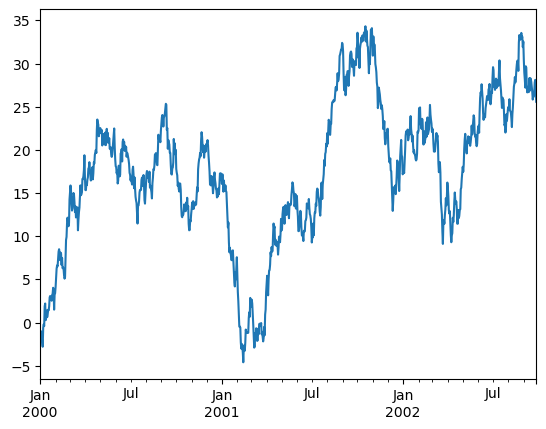

In [8]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot()

In [9]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

In [10]:
df = df.cumsum()

<Figure size 640x480 with 0 Axes>

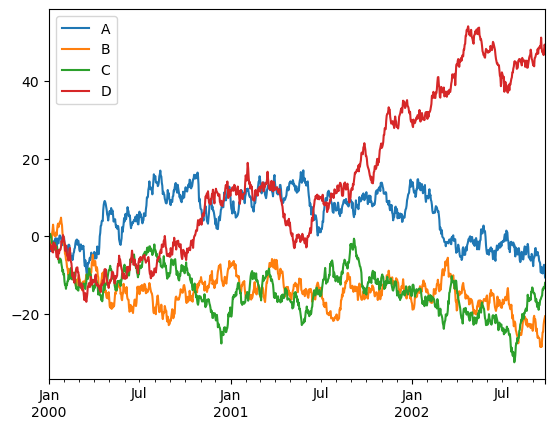

In [11]:
plt.figure()

df.plot()

plt.legend(loc='best')